In [28]:
from collections import Counter
import json

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF

sns.set(rc={'figure.figsize':(12,8)})

phrase_file = 'lecture_concepts.csv'
context_file = 'contexts_CS_410.json'

context = json.load(open(context_file, 'r'))
tid2lecNum = {}
lecNum2lecTitle = {}
for d in context:
    for c in d['contexts']:
        tid2lecNum[c['transcription']] = c['lecture_num']
        lecNum2lecTitle[c['lecture_num']] = c['lecture']


### Load Data

In [5]:
df_phrase = pd.read_csv(phrase_file, sep='\t').fillna('')

df_phrase['lecture_number'] = df_phrase['transcriptionid'].apply(lambda x: tid2lecNum[x])

df_phrase.head(2)

,transcriptionid,videoid,phrases_both,phrases_caption,phrases_video,lecture_number
0,9a443634-7f2e-4d3a-9ccd-0f1b6604c939,5d5ac9e4-567b-4ce1-a1b2-b4dd5197013c,"syntagmatic relation, relation discovery, para...","scoring function, text retrieval, similarity f...","similar word, paradigmatic relation discovery,...",9
1,6a9537c1-62fc-4f31-a8a7-bdfcad2f50eb,e212734f-6e3e-4124-ac91-f21ab1e126a1,"topic model, probabilistic topic, text mining,...","probabilistic model, zero probability, world d...","topic word distribution, computation task, top...",16


In [6]:
lecNum2phrasesBoth = dict(
    zip(df_phrase['lecture_number'], df_phrase['phrases_both']))
lecNum2phrasesCaption = dict(
    zip(df_phrase['lecture_number'], df_phrase['phrases_caption']))
lecNum2phrasesVideo = dict(
    zip(df_phrase['lecture_number'], df_phrase['phrases_video']))

lecNum2phrasesAll = {}
word_count = Counter()
for i in range(1, 51):
    if i not in lecNum2phrasesBoth:
        lecNum2phrasesAll[i] = {
            'both': {},
            'caption': {},
            'video': {},
        }
    else:
        lecNum2phrasesAll[i] = {
            'both': lecNum2phrasesBoth[i].split(', '),
            'caption': lecNum2phrasesCaption[i].split(', '),
            'video': lecNum2phrasesVideo[i].split(', '),
        }
        word_count+=(Counter(lecNum2phrasesBoth[i].split(', ')))
        word_count+=(Counter(lecNum2phrasesCaption[i].split(', ')))
        word_count+=(Counter(lecNum2phrasesVideo[i].split(', ')))

word_count.pop('')


9

In [7]:
word_count.most_common(60)

[('word distribution', 20),
 ('topic model', 19),
 ('text mining', 18),
 ('maximum likelihood', 17),
 ('mixture model', 15),
 ('generative model', 14),
 ('likelihood function', 14),
 ('likelihood estimator', 13),
 ('maximum likelihood estimator', 13),
 ('topic mining', 12),
 ('language model', 12),
 ('sentiment analysis', 11),
 ('text object', 10),
 ('probabilistic topic', 10),
 ('probabilistic topic model', 10),
 ('probabilistic model', 9),
 ('parameter value', 9),
 ('text categorization', 9),
 ('opinion mining', 8),
 ('data mining', 8),
 ('mining algorithm', 8),
 ('machine learning', 8),
 ('world distribution', 8),
 ('unigram language model', 8),
 ('unigram language', 8),
 ('text clustering', 8),
 ('categorization problem', 8),
 ('word association', 7),
 ('natural language', 7),
 ('syntagmatic relation', 7),
 ('maximum likelihood estimate', 7),
 ('likelihood estimate', 7),
 ('topic coverage', 7),
 ('topic word distribution', 7),
 ('topic word', 7),
 ('objective function', 7),
 ('back

In [8]:
word2interaction = {}
for w, c in word_count.most_common(60):
    inters = []
    for i in lecNum2phrasesAll:
        if w in lecNum2phrasesAll[i]['both']:
            inters.append(3)
        elif w in lecNum2phrasesAll[i]['caption']:
            inters.append(2)
        elif w in lecNum2phrasesAll[i]['video']:
            inters.append(1)
        else:
            inters.append(0)

    word2interaction[w] = inters

# convert to array
word2interaction = {k: np.array(word2interaction[k]) for k in word2interaction}

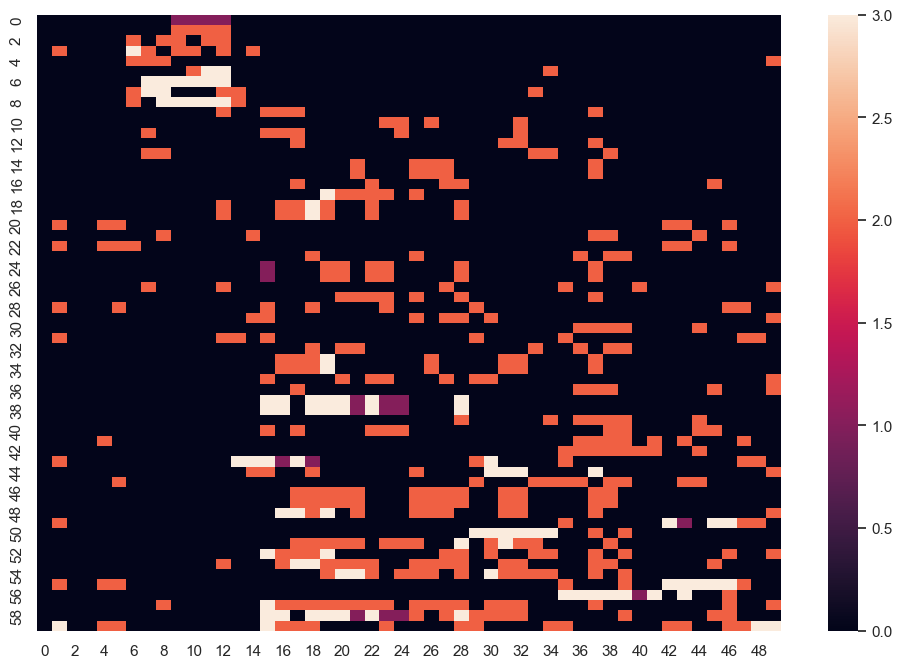

In [9]:
sns.heatmap(sorted(list(word2interaction.values()), key=lambda x: (x*np.arange(len(x))).sum()))
plt.show()

### NMF

In [10]:
# run NMF
N = 6
X = np.array(list(word2interaction.values()))
model = NMF(n_components=N, init='random', random_state=0)

W = model.fit_transform(list(word2interaction.values()))
H = model.components_

In [12]:
# phrase topics
phrases = np.array(list(word2interaction.keys()))
topic2phrases = {}
topic2weights = {}
topicIdx = W.argmax(axis=1)
topicWeight = W.max(axis=1)
for i in range(N):
    topic2phrases[i] = phrases[np.where(topicIdx==i)]
    topic2weights[i] = topicWeight[topicIdx==i]
topic2phrases

{0: array(['maximum likelihood', 'generative model', 'language model',
        'probabilistic topic', 'probabilistic topic model',
        'unigram language model', 'unigram language',
        'maximum likelihood estimate', 'likelihood estimate',
        'probability distribution', 'zero probability'], dtype='<U30'),
 1: array(['text mining', 'topic mining', 'sentiment analysis',
        'opinion mining', 'data mining', 'mining algorithm',
        'natural language', 'topic coverage', 'language processing'],
       dtype='<U30'),
 2: array(['word association', 'syntagmatic relation',
        'paradigmatic relation', 'relation discovery',
        'information retrieval', 'discover syntagmatic relation',
        'text retrieval', 'random variable',
        'syntagmatic relation discovery', 'mutual information'],
       dtype='<U30'),
 3: array(['word distribution', 'mixture model', 'likelihood function',
        'likelihood estimator', 'maximum likelihood estimator',
        'probabilist

C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

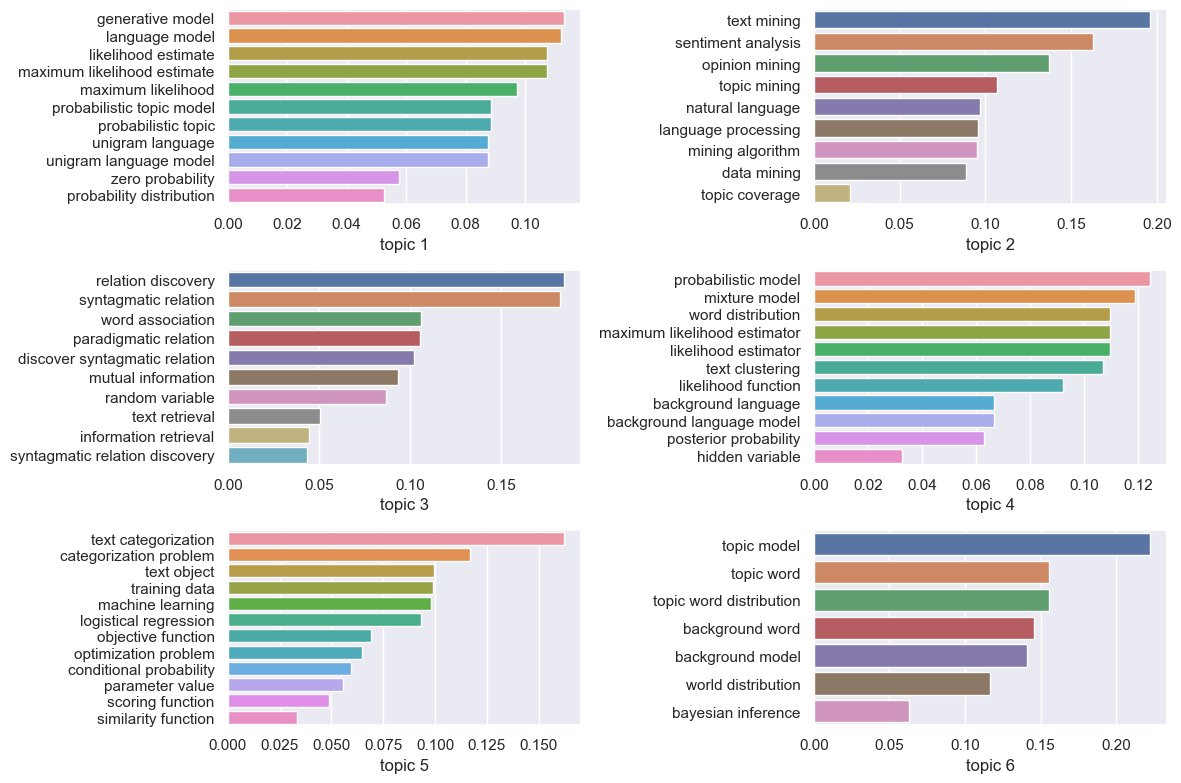

In [13]:
# visualization
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for topicId in range(N):
    idx = topic2weights[topicId].argsort()[::-1]
    sns.barplot(topic2weights[topicId][idx]/topic2weights[topicId][idx].sum(), topic2phrases[topicId][idx], ax=axes[topicId])
    axes[topicId].set_xlabel('topic %d'%(topicId+1))
    # axes[topicId].set_ylabel('phrases')

plt.tight_layout()
plt.show()

In [14]:
# lecture topics
lectureId = np.arange(1, 51)
topic2lecId = {}
topicIdx = H.argmax(axis=0)
topicWeight = H.max(axis=0)
for i in range(N):
    topic2lecId[i] = lectureId[np.where(topicIdx==i)]
    topic2weights[i] = topicWeight[topicIdx==i]
topic2lecId

topic2lecId[0] = topic2lecId[0][3:]
topic2weights[0] = topic2weights[0][3:]
topic2lecId

{0: array([17, 18, 19]),
 1: array([ 2,  5,  6, 30, 36, 43, 44, 46, 47, 48, 49]),
 2: array([ 7,  8,  9, 10, 11, 12, 13, 14]),
 3: array([15, 22, 26, 27, 28, 31, 32, 33, 34, 38, 50]),
 4: array([35, 37, 39, 40, 41, 42, 45]),
 5: array([16, 20, 21, 23, 24, 25, 29])}

C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\41113\anaconda3\envs\NFT\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

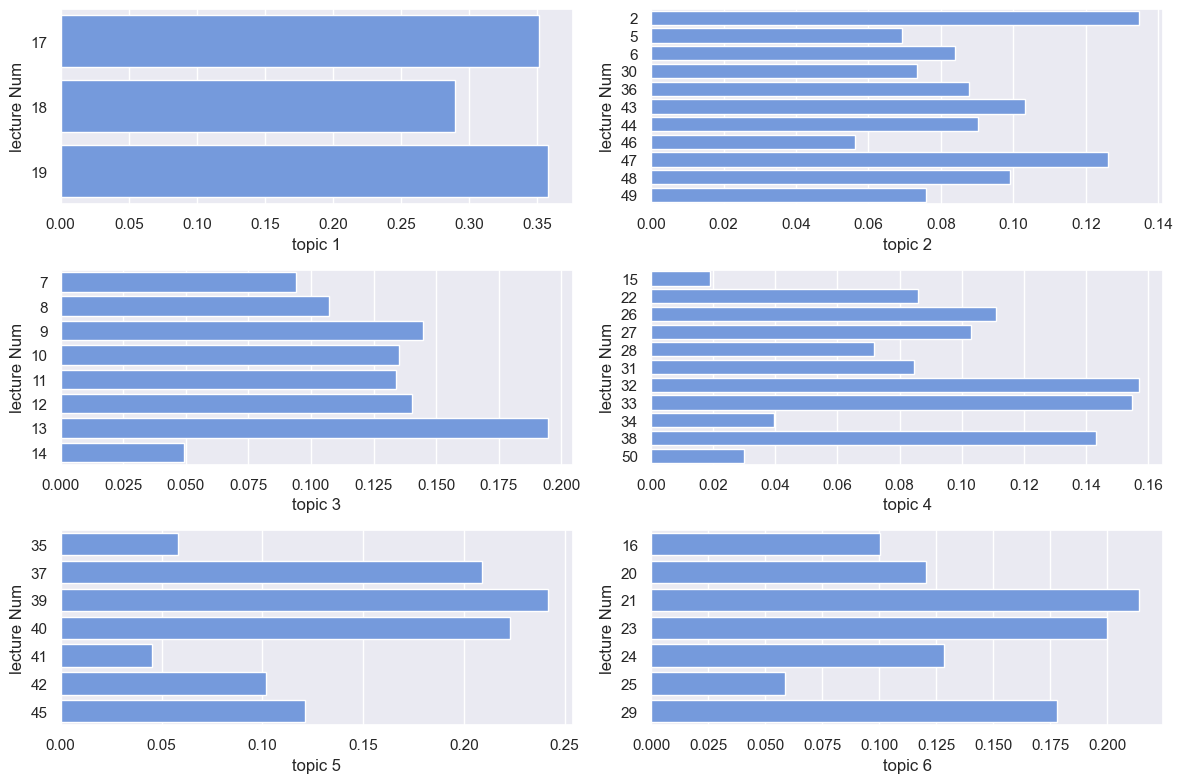

In [24]:
# visualization
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for topicId in range(N):
    # idx = topic2weights[topicId].argsort()[::-1]
    idx = np.arange(len(topic2weights[topicId]))
    sns.barplot(topic2weights[topicId][idx]/topic2weights[topicId][idx].sum(),
                topic2lecId[topicId][idx].astype(str),
                ax=axes[topicId], color='cornflowerblue')
    axes[topicId].set_xlabel('topic %d' % (topicId+1))
    axes[topicId].set_ylabel('lecture Num')

plt.tight_layout()
plt.show()


### error analysis

In [41]:

df_temp = pd.DataFrame({}, columns=['topic_id', 'lec_number', 'title',
                                    'phrase_both', 'phrase_caption', 'phrase_video'])

for topicNum in range(N):
    for lecNum in topic2lecId[topicNum]:
        df_temp.loc[len(df_temp)] = topicNum, lecNum, lecNum2lecTitle[lecNum], \
            lecNum2phrasesBoth[lecNum], lecNum2phrasesCaption[lecNum], lecNum2phrasesVideo[lecNum]

df_temp.to_excel('lecture_topics.xlsx', index=False)
df_temp

,topic_id,lec_number,title,phrase_both,phrase_caption,phrase_video
0,0,17,Lecture 17 — Probabilistic Topic Models Overv...,"language model, topic model, probabilistic top...","maximum likelihood estimate, likelihood estima...","unigram lm, simple language, simple language m..."
1,0,18,Lecture 18 — Probabilistic Topic Models Overv...,"language model, maximum likelihood, topic mining","maximum likelihood estimate, likelihood estima...","statistical language, statistical language model"
2,0,19,Lecture 19 — Probabilistic Topic Models Minin...,"maximum likelihood estimate, topic model, like...","objective function, optimization problem, unig...","mining one topic, simple case, one topic, topi..."
3,1,2,Lecture 2 — Overview Text Mining and Analytics...,text mining,"language processing, opinion mining, word asso...","overview text mining, overview text"
4,1,5,Lecture 5 — Text Representation - Part 1 | UIUC,,"language processing, text mining, sentiment an...",text representation
5,1,6,Lecture 6 — Text Representation - Part 2 | UIUC,,"language processing, text mining, text object,...",text representation
6,1,30,Lecture 30 — Text Clustering Motivation | UIUC,text clustering,"topic model, clustering result, text mining, t...",
7,1,36,Lecture 36 — Text Categorization Motivation | ...,text categorization,"training example, information retrieval, categ...","keyword text, predefined category, multiple un..."
8,1,43,Lecture 43 — Opinion Mining and Sentiment Anal...,"opinion mining, sentiment analysis","text mining, natural language, opinion holder,...","different kind, implicit holder, text datum"
9,1,44,"Lecture 44 — Opinion Mining, Sentiment Analysi...","text categorization, sentiment analysis","language processing, text mining, text object,...","task definition, text feature, sentiment class..."


In [35]:
lecNum2phrasesBoth[42]

'text categorization'